In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\91920\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
filename="E:\python\perrin-freres-monthly-champagne-.csv"

df=pd.read_csv(filename)
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)
df.drop(105,axis=0,inplace=True)

In [6]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [8]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [9]:
df.set_index('Month',inplace=True)
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [10]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


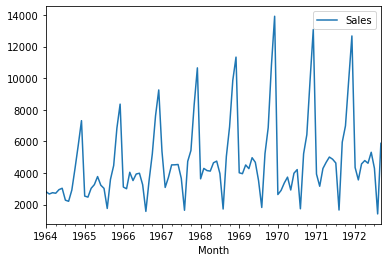

In [11]:
df.plot()

## Moving Average

#### This method removes the underlying trend in the time series also known as Detrending

In [12]:
# SMA over a period of 2 and 12 month 
#min_period = min value to start calculation

df['SMA_2'] = df.Sales.rolling(2, min_periods=1).mean()
df['SMA_12'] = df.Sales.rolling(12, min_periods=1).mean()
df.head(20)

,Sales,SMA_2,SMA_12
Month,,,
1964-01-01,2815.0,2815.0,2815.000000
1964-02-01,2672.0,2743.5,2743.500000
1964-03-01,2755.0,2713.5,2747.333333
1964-04-01,2721.0,2738.0,2740.750000
1964-05-01,2946.0,2833.5,2781.800000
1964-06-01,3036.0,2991.0,2824.166667
1964-07-01,2282.0,2659.0,2746.714286
1964-08-01,2212.0,2247.0,2679.875000
1964-09-01,2922.0,2567.0,2706.777778


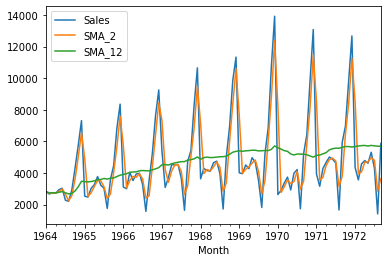

In [13]:
df.plot()

In [14]:
df['CMA']= df.Sales.expanding(min_periods=1).mean()  # cummulative moving average the cumulative moving average considers all of the preceding values when calculating the average.
df.head(15)

,Sales,SMA_2,SMA_12,CMA
Month,,,,
1964-01-01,2815.0,2815.0,2815.000000,2815.000000
1964-02-01,2672.0,2743.5,2743.500000,2743.500000
1964-03-01,2755.0,2713.5,2747.333333,2747.333333
1964-04-01,2721.0,2738.0,2740.750000,2740.750000
1964-05-01,2946.0,2833.5,2781.800000,2781.800000
1964-06-01,3036.0,2991.0,2824.166667,2824.166667
1964-07-01,2282.0,2659.0,2746.714286,2746.714286
1964-08-01,2212.0,2247.0,2679.875000,2679.875000
1964-09-01,2922.0,2567.0,2706.777778,2706.777778


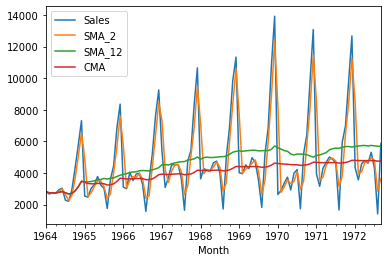

In [15]:
df.plot()

## Exponential Moving Average

In [16]:
# EMA Sales
#Exponential Moving Average (EMA) does a superb job in capturing the pattern of the data (0,1)
# Let's smoothing factor - 0.1
df['EMA_0.1'] = df.Sales.ewm(alpha=0.1, adjust=False).mean()
# Let's smoothing factor  - 0.3
df['EMA_0.3'] = df.Sales.ewm(alpha=0.3, adjust=False).mean()

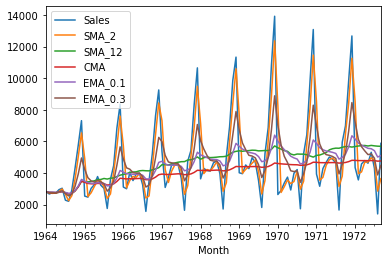

In [17]:
df.plot()

# Check for Stationarity
#### Two common methods to check for stationarity are Visualization and the Augmented Dickey-Fuller (ADF) Test. Python makes both approaches easy:

In [15]:
# Rolling Statistics or Visualization

rolmean = df.Sales.rolling(window=12).mean()
rolstd = df.Sales.rolling(window=12).std()

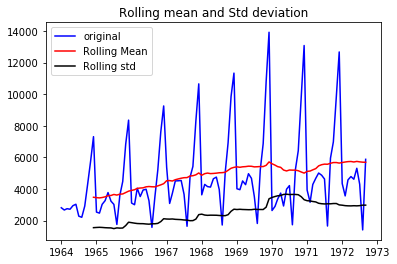

In [16]:
orig = plt.plot(df.Sales,color='blue',label='original')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling std')
plt.legend()
plt.title('Rolling mean and Std deviation')
plt.show()

In [17]:
### Testing For Stationarity using Dickey-fuller test

from statsmodels.tsa.stattools import adfuller

In [18]:
test_result=adfuller(df['Sales'])
test_result  # 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

(-1.8335930563276297,
 0.3639157716602417,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [19]:
#Ho: It is not stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    #print(result)
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, indicating it is non-stationary ")

In [20]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276297
p-value : 0.3639157716602417
Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, indicating it is non-stationary 


# Converting Non- stationary into stationary

### Detrending
This method removes the underlying trend in the time series:

In [29]:
# Detrending
df_detrend =  (df['Sales'] - df['Sales'].rolling(window=12).mean())/df['Sales'].rolling(window=12).std()

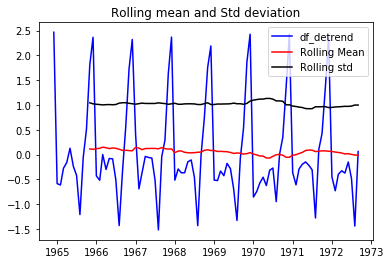

In [30]:
# Rolling Statistics or Visualization

rolmean = df_detrend.rolling(window=12).mean()
rolstd = df_detrend.rolling(window=12).std()

orig = plt.plot(df_detrend,color='blue',label='df_detrend')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling std')
plt.legend()
plt.title('Rolling mean and Std deviation')
plt.show()

In [31]:
#ad fuller test
adfuller_test(df_detrend.dropna())

ADF Test Statistic : -1.5854241126412958
p-value : 0.4909112123799473
Lags Used : 11
Number of Observations Used : 82
weak evidence against null hypothesis, indicating it is non-stationary 


### Differencing
This method removes the underlying seasonal or cyclical patterns in the time series. Since the sample dataset has a 12-month seasonality, I used a 12-lag difference:

In [12]:
df['Seasonal_Difference']=df['Sales']-df['Sales'].shift(12)

In [13]:
df.head(15)

,Sales,Seasonal_Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [21]:
## Again test dickey fuller test
adfuller_test(df['Seasonal_Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


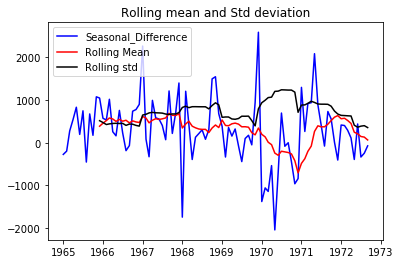

In [22]:
# Rolling Statistics

rolmean = df['Seasonal_Difference'].rolling(window=12).mean()
rolstd = df['Seasonal_Difference'].rolling(window=12).std()
#orig = plt.plot(df.Sales,color='yellow',label='original')
Seasonal_Difference = plt.plot(df['Seasonal_Difference'],color='blue',label='Seasonal_Difference')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling std')
plt.legend()
plt.title('Rolling mean and Std deviation')
plt.show()

# Forcasting on Stationary dataset

In [23]:
S_df= df['Seasonal_Difference']
n_df = pd.DataFrame(S_df.T)
n_df.dropna(inplace=True)

In [24]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93 entries, 1965-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Seasonal_Difference  93 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


#### Set the y_to_train, y_to_test, and the length of predict units

In [25]:
y_to_train = n_df.iloc[:75] # dataset to train
y_to_test = n_df.iloc[75:] # last X months for test  
predict_date = len(n_df) - len(y_to_train)  #lenght of dataset - len of training dataset

In [26]:
predict_date  # len(y_to_val)

18

## Exponential Moving Average

In [74]:
from statsmodels.tsa.api import SimpleExpSmoothing 

0.06885982345800531


C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


<function matplotlib.pyplot.show(*args, **kw)>

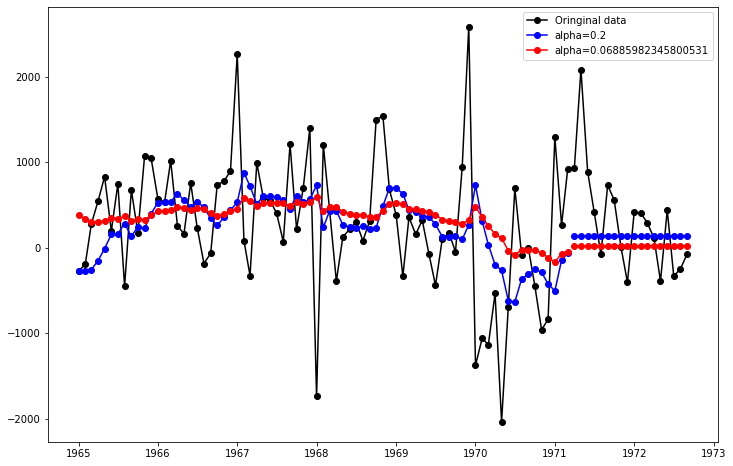

In [80]:
fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(predict_date)

fit2 = SimpleExpSmoothing(y_to_train).fit() 
#statsmodels to automatically find an optimized alpha value for us.
fcast2 = fit2.forecast(predict_date)

alpha = fit2.params["smoothing_level"]
print(alpha)

plt.figure(figsize=(12, 8))
plt.plot(n_df, marker="o", color="black",label='Oringinal data')

plt.plot(fit1.fittedvalues, marker="o", color="blue")
line1 = plt.plot(fcast1, marker="o", color="blue",label='alpha=0.2')

plt.plot(fit2.fittedvalues, marker="o", color="red")
line2 = plt.plot(fcast2, marker="o", color="red",label=f'alpha={alpha}')

plt.legend()
plt.show

In [84]:
#square sum error
sse1 =fit1.sse
print(sse1)
sse2 =fit2.sse
print(sse2)

48770904.168382205
46338230.633439496


## Holt’s Linear Trend Method

Suitable for time series data with a trend component but without a seasonal component

In [82]:
from statsmodels.tsa.api import Holt

0.08483363425746164
0.08483065505386704


C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


<function matplotlib.pyplot.show(*args, **kw)>

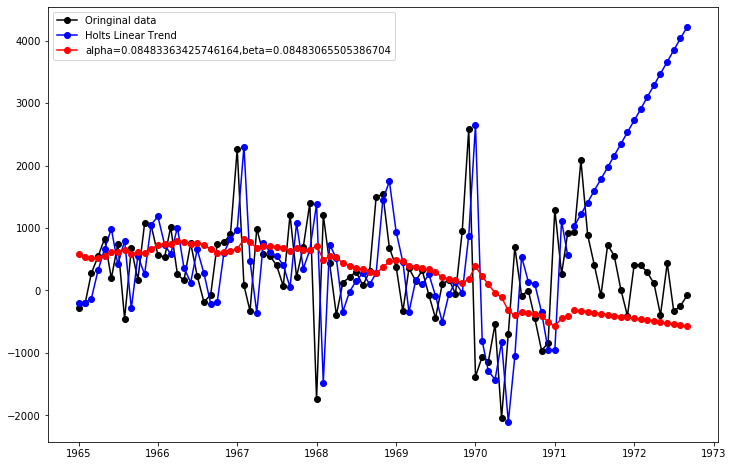

In [89]:
fit1 = Holt(y_to_train).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)  #smoothing_trend
fcast1 = fit1.forecast(predict_date)

fit2 = Holt(y_to_train).fit()
fcast2 = fit2.forecast(predict_date)
            
           
alpha = fit2.params["smoothing_level"]
print(alpha)
beta = fit2.params["smoothing_slope"]
print(beta)            
            
            
plt.figure(figsize=(12, 8))
plt.plot(n_df, marker="o", color="black",label='Oringinal data')

plt.plot(fit1.fittedvalues, marker="o", color="blue")
line1 = plt.plot(fcast1, marker="o", color="blue",label='Holts Linear Trend')

plt.plot(fit2.fittedvalues, marker="o", color="red")
line2 = plt.plot(fcast2, marker="o", color="red",label=f'alpha={alpha},beta={beta}')

plt.legend()
plt.show

In [90]:
#square sum error
sse1 =fit1.sse
print(sse1)
sse2 =fit2.sse
print(sse2)

76710338.37726729
48405678.50179307


## Holt-Winters’ Seasonal Method
Suitable for time series data with trend and/or seasonal components

In [27]:
from statsmodels.tsa.api import ExponentialSmoothing

C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<function matplotlib.pyplot.show(*args, **kw)>

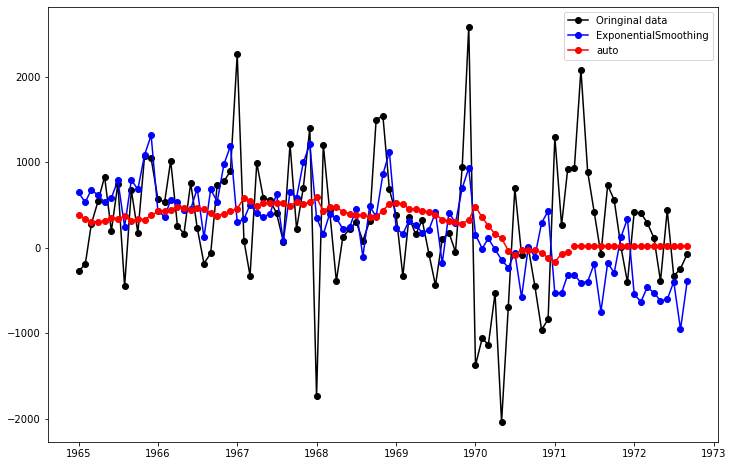

In [28]:
fit1 = ExponentialSmoothing(y_to_train,seasonal_periods = 12, trend='add', seasonal='add').fit()
fcast1 = fit1.forecast(predict_date)

fit2 = ExponentialSmoothing(y_to_train).fit()  # use_boxcox=True
fcast2 = fit2.forecast(predict_date)            
            
plt.figure(figsize=(12, 8))
plt.plot(n_df, marker="o", color="black",label='Oringinal data')

plt.plot(fit1.fittedvalues, marker="o", color="blue")
line1 = plt.plot(fcast1, marker="o", color="blue",label='ExponentialSmoothing')

plt.plot(fit2.fittedvalues, marker="o", color="red")
line2 = plt.plot(fcast2, marker="o", color="red",label='auto')

plt.legend()
plt.show

In [29]:
#square sum error
sse1 =fit1.sse
print(sse1)
sse2 =fit2.sse
print(sse2)

40667304.40999994
46338230.633439496


In [30]:
fcast1 = fit1.forecast(30)
fcast1

1971-04-01    -318.835930
1971-05-01    -411.941693
1971-06-01    -397.377452
1971-07-01    -189.384556
1971-08-01    -747.690978
1971-09-01    -179.018627
1971-10-01    -295.125461
1971-11-01     123.107110
1971-12-01     336.874258
1972-01-01    -545.779387
1972-02-01    -633.483027
1972-03-01    -463.865414
1972-04-01    -528.349250
1972-05-01    -621.455013
1972-06-01    -606.890772
1972-07-01    -398.897876
1972-08-01    -957.204298
1972-09-01    -388.531948
1972-10-01    -504.638781
1972-11-01     -86.406210
1972-12-01     127.360938
1973-01-01    -755.292707
1973-02-01    -842.996347
1973-03-01    -673.378734
1973-04-01    -737.862570
1973-05-01    -830.968333
1973-06-01    -816.404093
1973-07-01    -608.411196
1973-08-01   -1166.717619
1973-09-01    -598.045268
Freq: MS, dtype: float64